# ***Ejercicio 2***

## Estadísticos:
Seguiremos trabajando con el conjunto de datos de 120 años de historia olímpica adquirido por Randi Griffin en [Randi Griffin](#).

Como especialista en visualización, su tarea consiste en crear dos parcelas para los ganadores de medallas de 2016 de cinco deportes: atletismo, natación, remo, fútbol y hockey.

- Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de **height** y **weight** de los ganadores de medallas de 2016 de los cinco deportes.

- Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.

Utilizar su creatividad y sus habilidades para sacar conclusiones importantes de los datos.

## Pasos importantes
- Descargue el conjunto de datos y formatéelo como un **pandas** DataFrame.

- Filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los deportes mencionados en la descripción de la actividad.

- Observe las características del conjunto de datos y anote su tipo de datos: ¿son categóricos o numéricos?

- Evaluar cuál sería la visualización adecuada para que un patrón global represente las características de **height** y **weight**.

- Evaluar cuál sería la visualización adecuada para representar las estadísticas resumidas de las características de **height** y **weight** en función de las medallas, separadas además por género de los atletas.


## librerias y datos

In [79]:
# Librerías necesarias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
olympics_url = "C:/Users/acarb/Documents/vis/events.csv"
ol= pd.read_csv(olympics_url, usecols=['Sex', 'Age', 'Height', 'Weight','Team','Year','Sport','Medal'])
md2016 = ol.loc[ol['Year']==2016]
md2016 =  md2016[md2016['Medal'].notna()]
md2016.head()

,Sex,Age,Height,Weight,Team,Year,Sport,Medal
158,M,21.0,198.0,90.0,Italy,2016,Rowing,Bronze
161,F,21.0,165.0,49.0,Azerbaijan,2016,Taekwondo,Bronze
175,M,31.0,182.0,86.0,France,2016,Handball,Silver
450,M,26.0,170.0,80.0,Iran,2016,Wrestling,Bronze
794,M,24.0,161.0,62.0,Russia,2016,Gymnastics,Silver


## Exploración de variables

In [80]:
md2016t = md2016.dtypes.reset_index()
md2016t.columns = ['Varible', 'Tipo de variable']
md2016t

,Varible,Tipo de variable
0,Sex,object
1,Age,float64
2,Height,float64
3,Weight,float64
4,Team,object
5,Year,int64
6,Sport,object
7,Medal,object


## Inciso A
Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 de los cinco deportes.

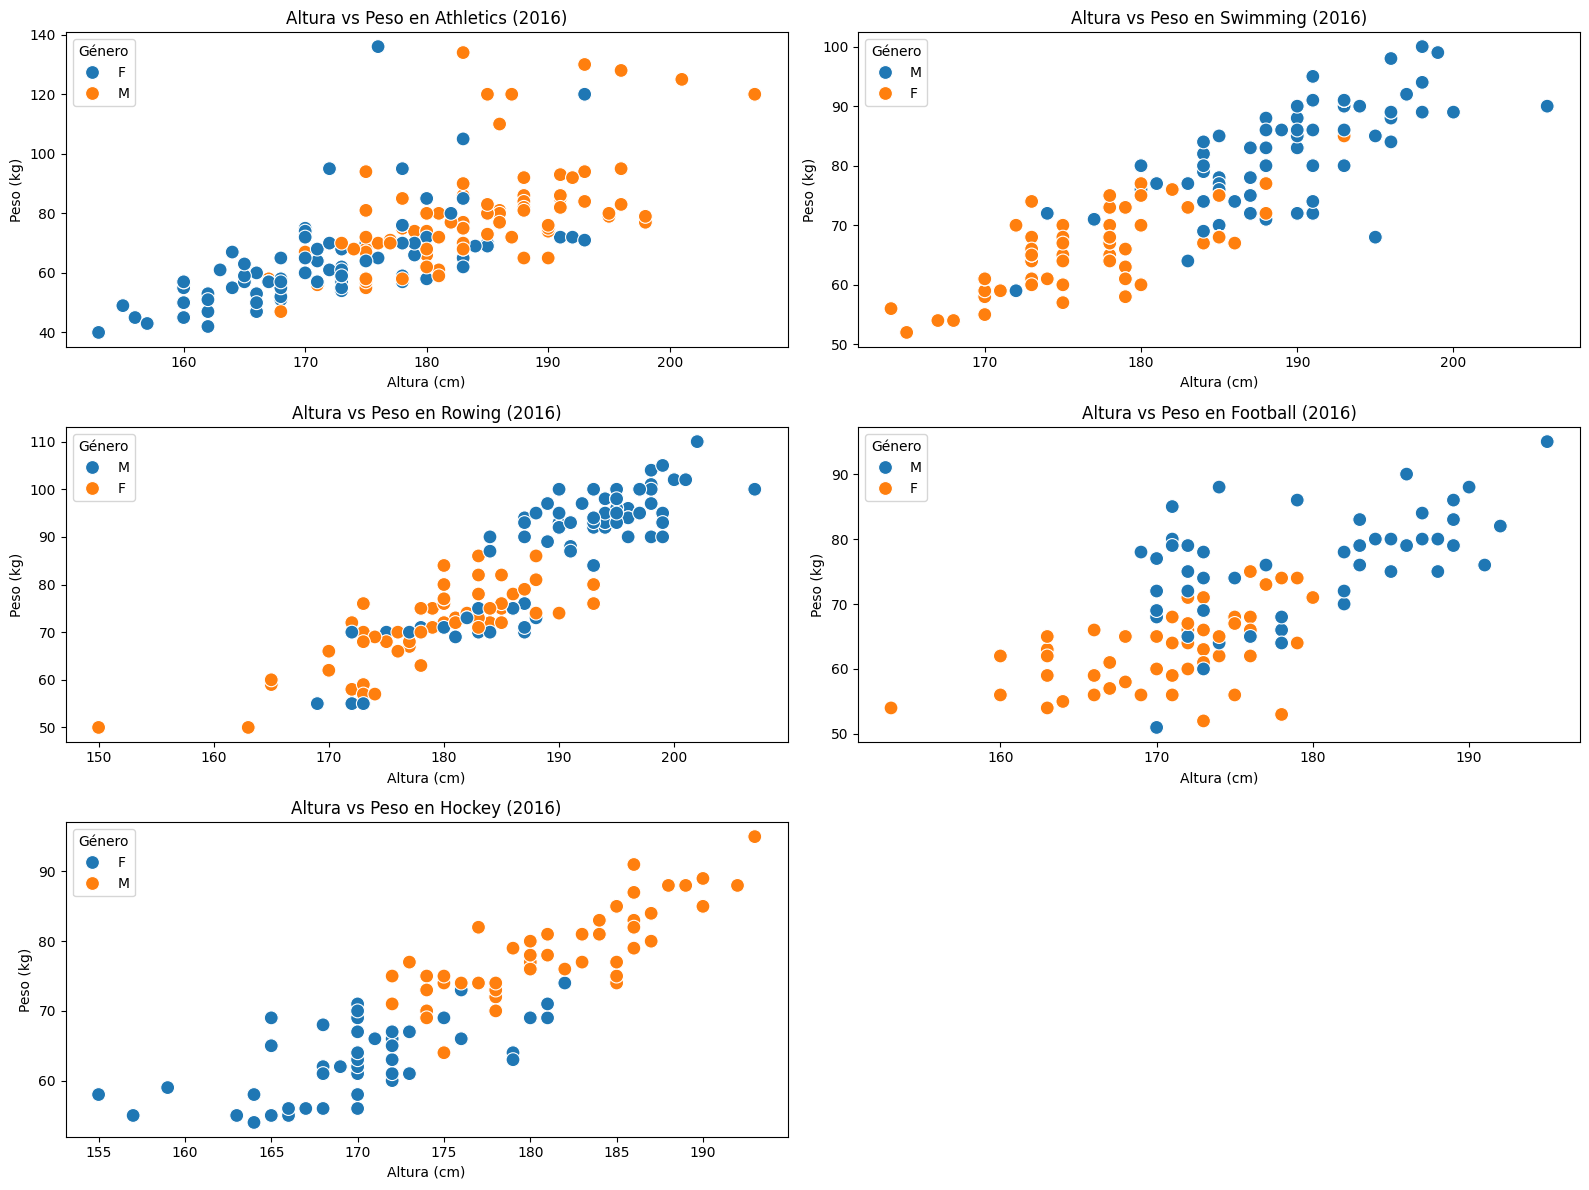

In [81]:
sports = md2016['Sport'].value_counts().head(5).index
top5 = md2016[md2016['Sport'].isin(sports)]

plt.figure(figsize=(16, 12))

for i, sport in enumerate(sports):
    plt.subplot(3, 2, i + 1)  
    sns.scatterplot(x='Height', y='Weight', hue='Sex', data=top5[top5['Sport'] == sport], s=100)
    plt.title(f'Altura vs Peso en {sport} (2016)')
    plt.xlabel('Altura (cm)')
    plt.ylabel('Peso (kg)')
    plt.legend(title='Género', loc='upper left')

plt.tight_layout() 
plt.show()

## Inciso B
Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.

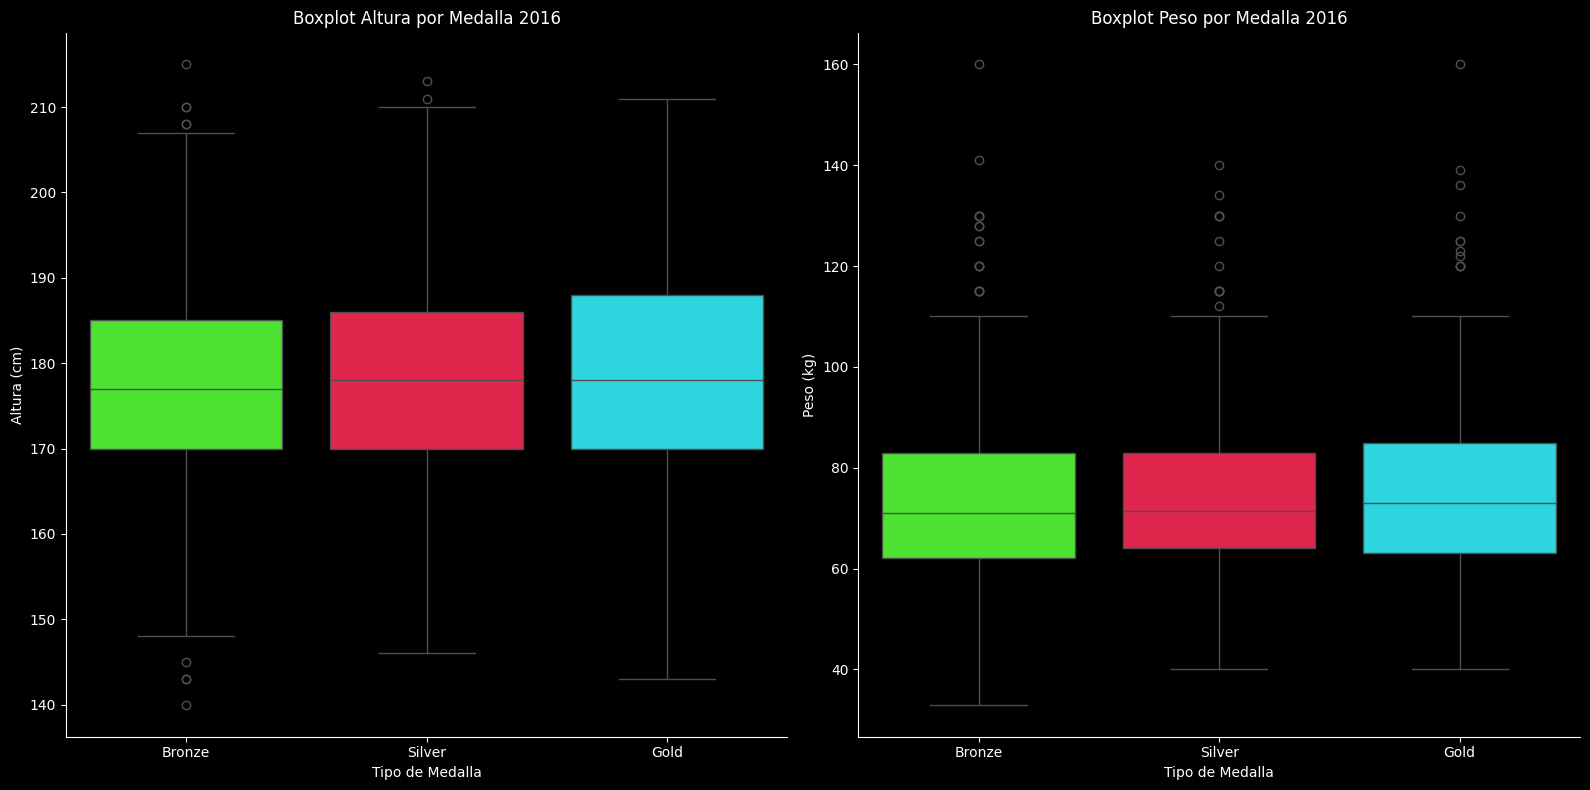

In [82]:

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

fig.patch.set_facecolor('black')  
for ax in axes:
    ax.set_facecolor('black')  
    ax.title.set_color('white')  
    ax.xaxis.label.set_color('white')  
    ax.yaxis.label.set_color('white')  
    ax.tick_params(axis='x', colors='white') 
    ax.tick_params(axis='y', colors='white')  
    ax.spines['bottom'].set_color('white')  
    ax.spines['left'].set_color('white') 

colores_neon = ['#39FF14', '#FF073A', '#0FF0FC', '#FF61A6', '#FE01B1']

sns.boxplot(ax=axes[0], x='Medal', y='Height', data=md2016, palette=colores_neon)
axes[0].set_title('Boxplot Altura por Medalla 2016')
axes[0].set_xlabel('Tipo de Medalla')
axes[0].set_ylabel('Altura (cm)')

sns.boxplot(ax=axes[1], x='Medal', y='Weight', data=md2016, palette=colores_neon)
axes[1].set_title('Boxplot Peso por Medalla 2016')
axes[1].set_xlabel('Tipo de Medalla')
axes[1].set_ylabel('Peso (kg)')

plt.tight_layout()  
plt.show()


### Boxplot de Altura por Tipo de Medalla

#### Rango de Altura:
- La mayoría de los medallistas, independientemente del tipo de medalla, tienen una altura que oscila entre aproximadamente 170 cm y 200 cm.
- La mediana de la altura parece ser ligeramente superior en los ganadores de medallas de Oro en comparación con los de Bronce y Plata, aunque las diferencias no son grandes.

#### Analisis:
- Los atletas más altos parecen tener una ligera ventaja para ganar medallas de Oro, pero la altura no parece ser un factor determinante significativo entre los diferentes niveles de medalla. Esto podría reflejar que, si bien la altura puede ser un factor importante en algunos deportes, no es decisiva en la obtención de una medalla de un determinado valor (Oro, Plata, Bronce).

### Boxplot de Peso por Tipo de Medalla

#### Rango de Peso:
- El peso de los medallistas se concentra principalmente entre 60 kg y 100 kg, independientemente del tipo de medalla. No se observa una diferencia significativa en la mediana del peso entre los ganadores de Oro, Plata y Bronce.

#### Analisis:
- Al igual que con la altura, el peso de los atletas no muestra una diferencia marcada entre los tipos de medalla. Esto sugiere que, en los deportes analizados, el peso podría no ser un factor diferenciador importante para la obtención de una medalla de mayor valor.
